<h1 align="center">Heart Attack Analysis and Prediction</h1>

1. [Introduction](#1) <a id=18></a>
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Data Source Links](#51)
    - 1.3 [Task](#3)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Bivariate Analysis](#10)
4. [Data Preprocessing](#11)
    - 4.1 [Conclusions from the EDA](#12)
    - 4.2 [Packages](#13)
    - 4.3 [Making features model ready](#14)
5. [Modeling](#15)
    - 5.1 [Linear Classifiers](#16)
    - 5.2 [Tree Models](#17)

### 1. Introduction <a id=1></a>
[back to top](#18)

#### 1.1 Data Dictionary <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

#### 1.2 Data source links <a id=51></a>

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### 1.3 Task <a id=3></a>
To perform EDA and predict if a person is prone to a heart attack or not.

### 2. Preparation <a id=4></a>
[back to top](#18)

#### 2.1 Packages <a id=5></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 2.2 Data <a id=6></a>

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

#### 2.3 Understanding Data <a id=7></a>

##### 2.3.1 The shape of the dataset

In [3]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (303, 14)


##### 2.3.2 Preview of the first 5 rows of dataset

In [4]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### 2.3.3 Checking the number of unique values in each column

In [5]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]
    
pd.DataFrame(dict, index=["unique value count"]).transpose()

,unique value count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


##### 2.3.4 Separating Continuous, Categorical and target variables

In [6]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


##### 2.3.5 Summary statistics for continuous columns

In [7]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##### 2.3.6 Missing Values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no missing values in the given dataset.

### 3. Exploratory Data Analysis <a id=8></a>

#### 3.1 Univariate Analysis <a id=9></a>

##### 3.1.2 Count plot for categorical features

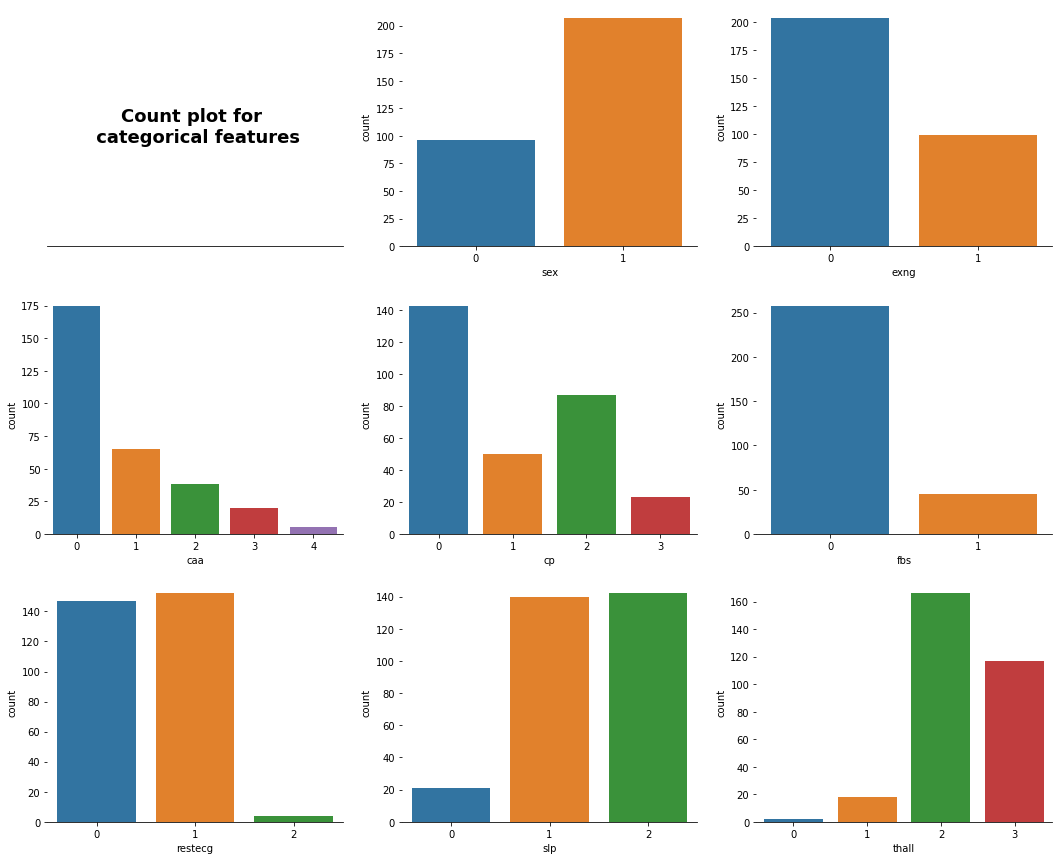

In [9]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)

ax0 = fig.add_subplot(gs[0,0])
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Count plot for \n categorical features", 
         horizontalalignment='center', 
         verticalalignment='center',
        fontsize='18', fontweight='bold')


ax1 = fig.add_subplot(gs[0,1])
sns.countplot(data=df, x=cat_cols[0], ax=ax1)

ax2 = fig.add_subplot(gs[0,2])
sns.countplot(data=df, x=cat_cols[1], ax=ax2)

ax3 = fig.add_subplot(gs[1,0])
sns.countplot(data=df, x=cat_cols[2], ax=ax3)

ax4 = fig.add_subplot(gs[1,1])
sns.countplot(data=df, x=cat_cols[3], ax=ax4)

ax5 = fig.add_subplot(gs[1,2])
sns.countplot(data=df, x=cat_cols[4], ax=ax5)

ax6 = fig.add_subplot(gs[2,0])
sns.countplot(data=df, x=cat_cols[5], ax=ax6)

ax7 = fig.add_subplot(gs[2,1])
sns.countplot(data=df, x=cat_cols[6], ax=ax7)

ax8 = fig.add_subplot(gs[2,2])
sns.countplot(data=df, x=cat_cols[7], ax=ax8)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

#### 3.1.3 Box Plot for Continuous Variables

<AxesSubplot:xlabel='oldpeak'>

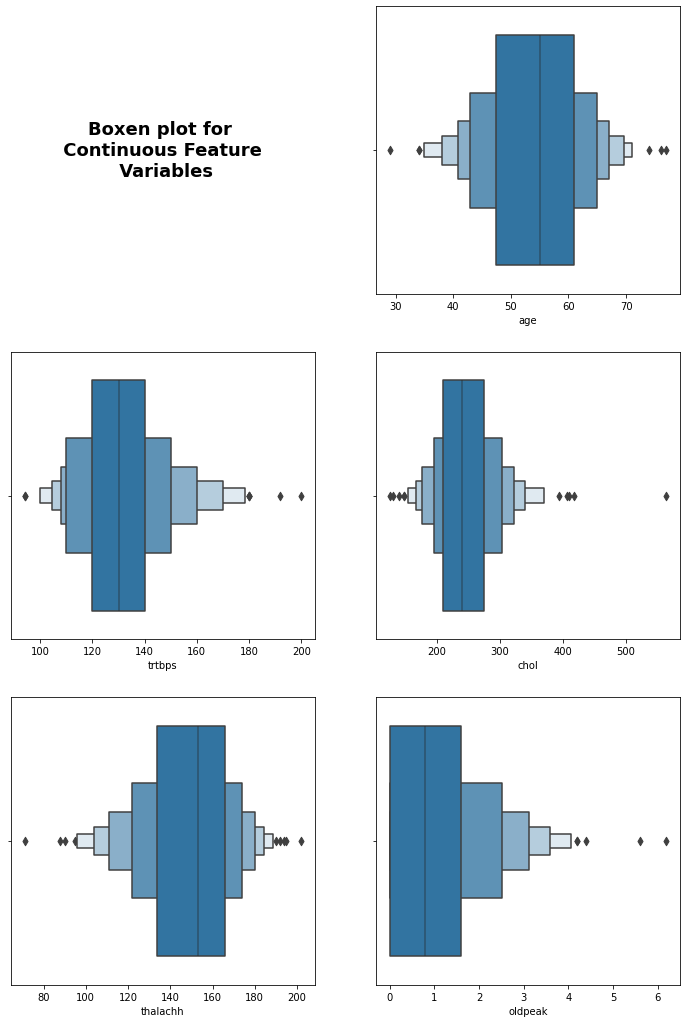

In [10]:
fig = plt.figure(figsize=(12, 18))
gs = fig.add_gridspec(3,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, s="Boxen plot for \n Continuous Feature \n Variables",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold')

sns.boxenplot(ax=ax1, x=df[con_cols[0]])
sns.boxenplot(ax=ax2, x=df[con_cols[1]])
sns.boxenplot(ax=ax3, x=df[con_cols[2]])
sns.boxenplot(ax=ax4, x=df[con_cols[3]])
sns.boxenplot(ax=ax5, x=df[con_cols[4]])

##### 3.1.3 Count plot of target

<AxesSubplot:xlabel='output', ylabel='count'>

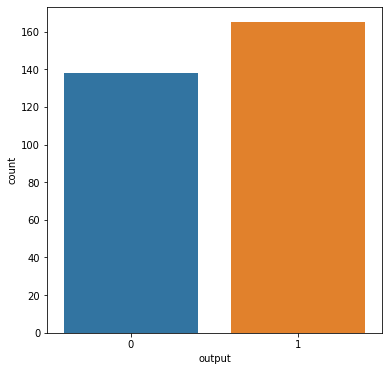

In [11]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x=target_col[0], data=df)

#### 3.2 Bivariate Analysis <a id=10></a>

##### 3.2.1 Correlation matrix of continuous features

<AxesSubplot:>

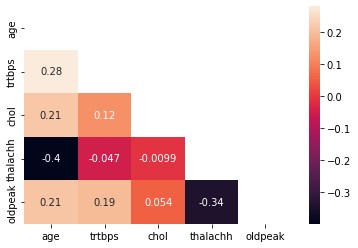

In [12]:
df_corr = df[con_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, mask=mask)

##### 3.2.2 Scatterplot heatmap of dataframe

<Figure size 864x864 with 0 Axes>

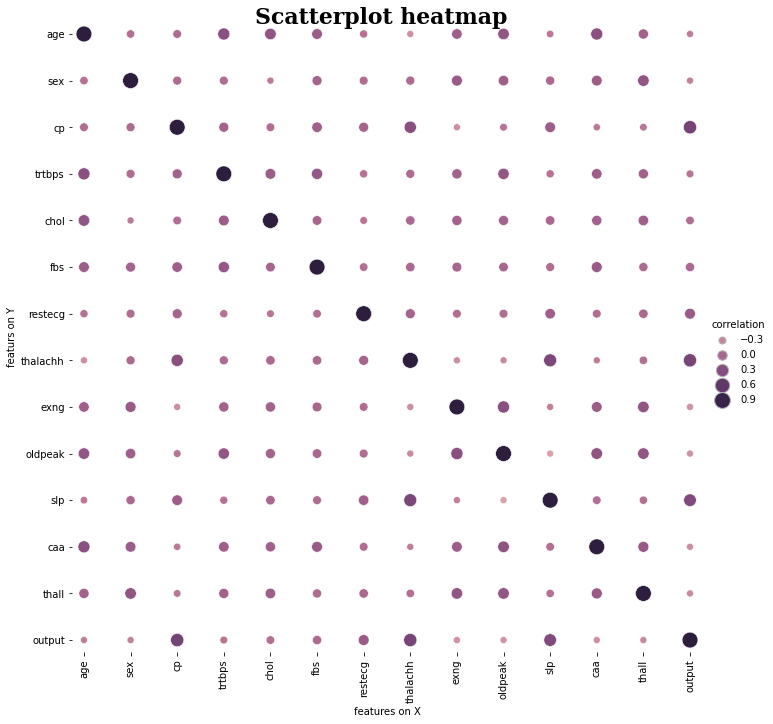

In [13]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name='correlation')
grid = sns.relplot(data=corr_mat, 
                   x='level_0', y='level_1', 
                   hue='correlation', hue_norm=(-1, 1), 
                   height=10,  sizes=(50, 250), size_norm=(-.2, .8), size="correlation")

grid.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
grid.despine(bottom=True, left=True)
grid.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif')
grid.ax.margins(.02)

for label in grid.ax.get_xticklabels():
    label.set_rotation(90)
for artist in grid.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

##### 3.2.2 Distribution of Continuous features

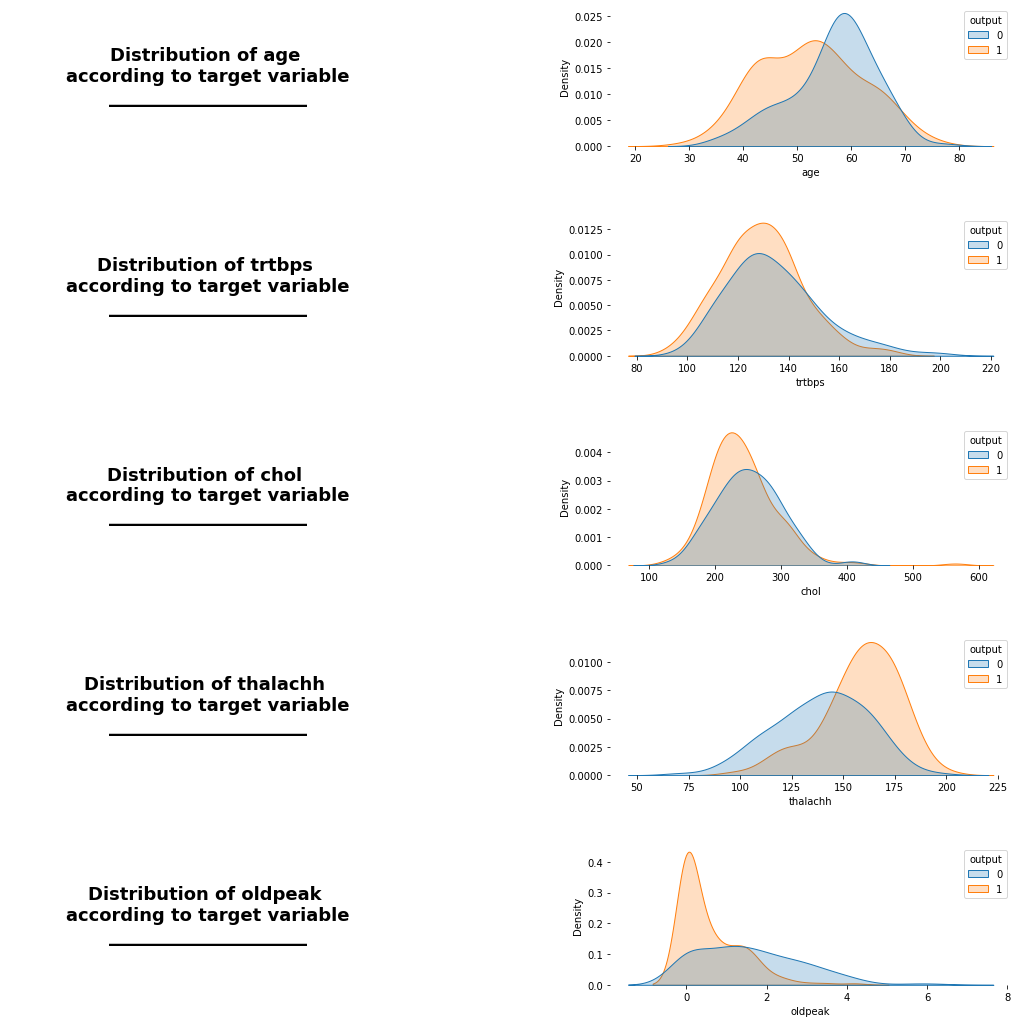

In [14]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[0]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax1, data=df, hue='output', x=con_cols[0], fill=True)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
ax2.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[1]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax3, data=df, hue='output', x=con_cols[1], fill=True)

ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
ax4.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[2]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax5, data=df, hue='output', x=con_cols[2], fill=True)

ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
ax6.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[3]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

sns.kdeplot(ax=ax7, data=df, hue='output', x=con_cols[3], fill=True)

ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
ax8.text(x=0.5, y=0.5, s="Distribution of {} \naccording to target variable\n______________________".format(con_cols[4]),
        horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')


sns.kdeplot(ax=ax9, data=df, hue='output', x=con_cols[4], fill=True)

for i in ['left', 'top', 'bottom', 'right']:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    
plt.show()

##### 3.2.3 Other relations that seems intuitive

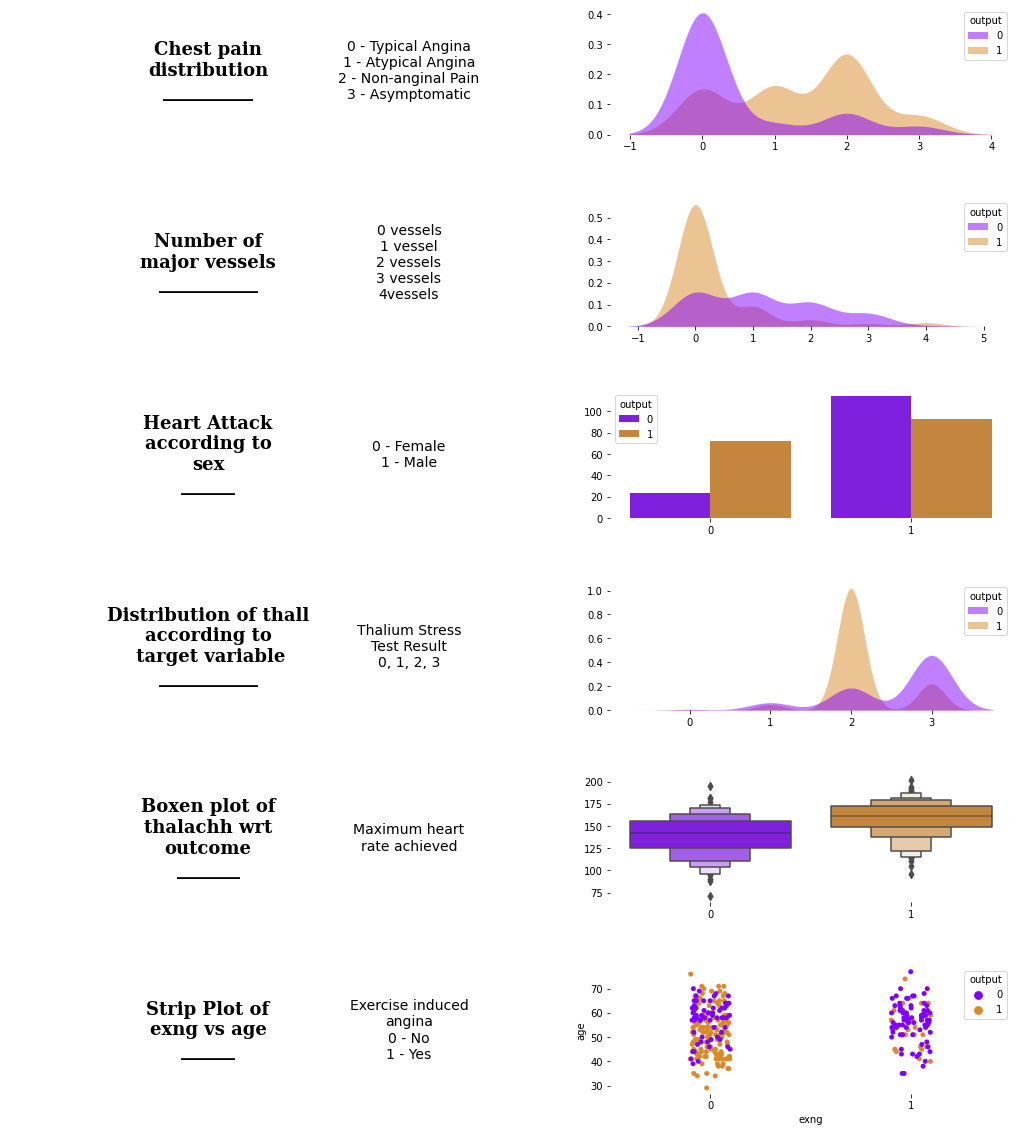

In [15]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right", "bottom"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

##### 3.2.4 Pair plot according to target variable

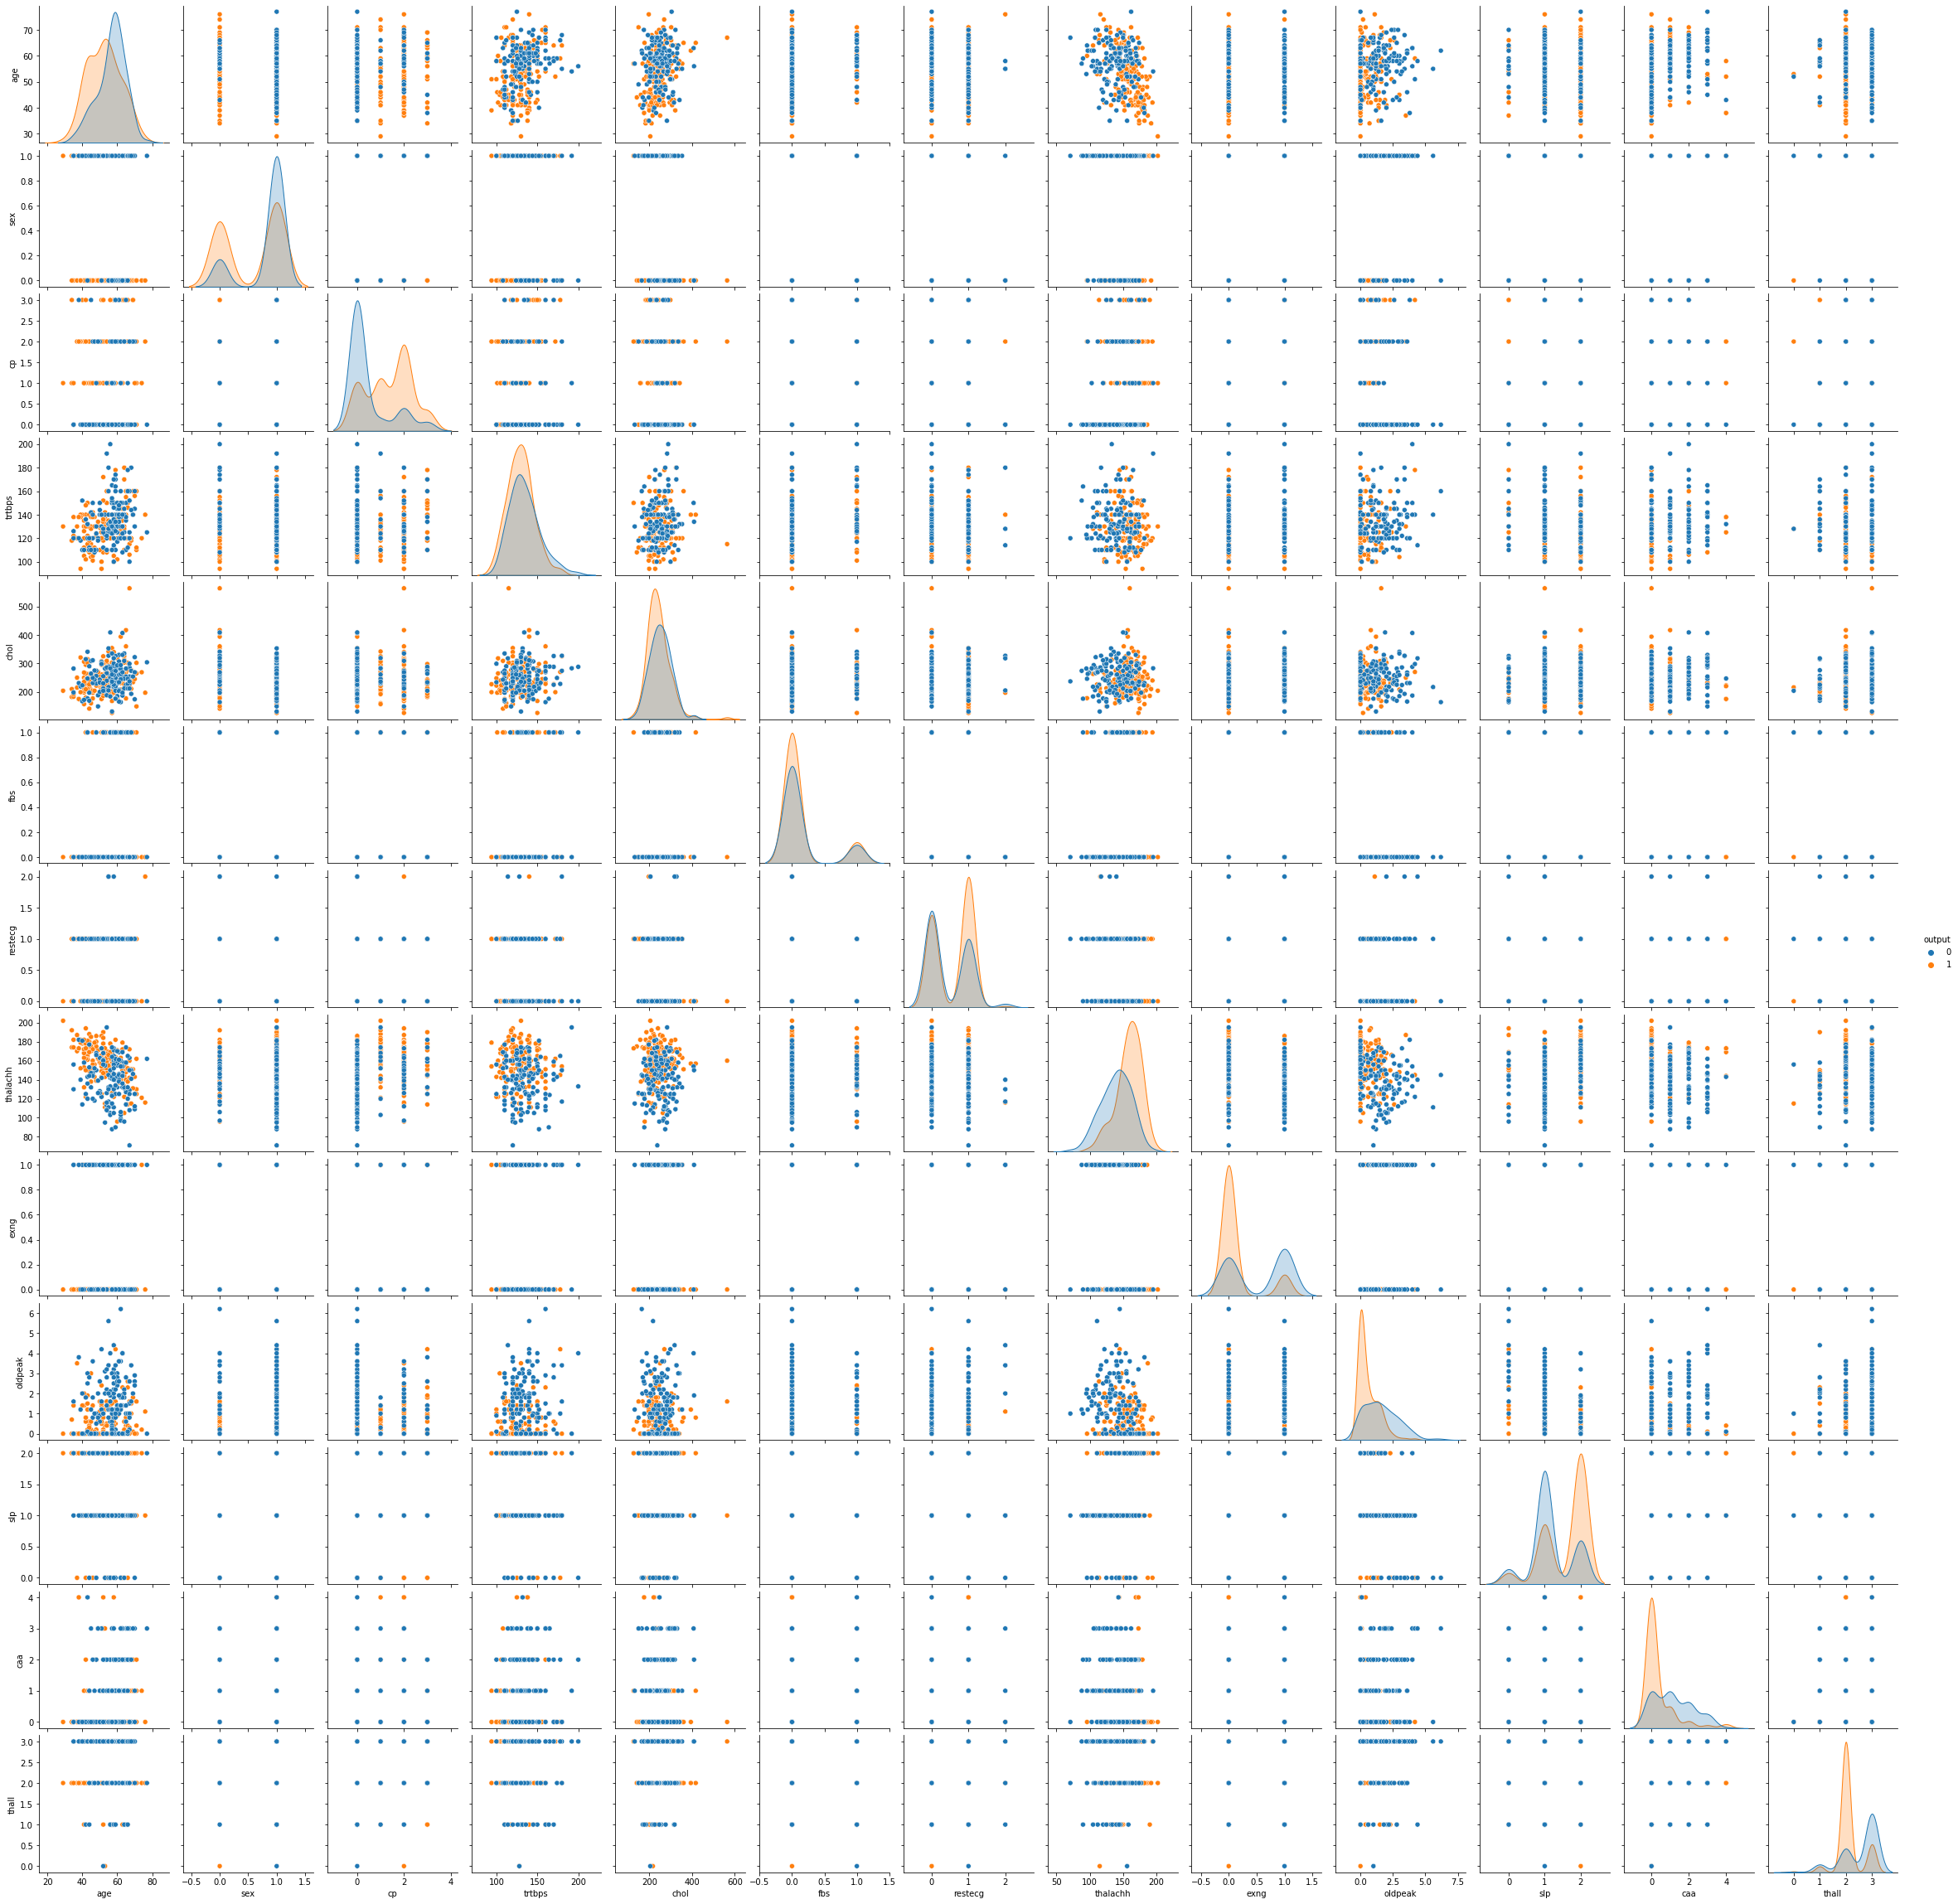

In [16]:
sns.pairplot(data=df, hue='output')
plt.show()

### 4. Data Pre-Processing <a id=11></a>

#### 4.1 Conclusions from EDA <a id=12></a>

1. There are no NaN values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with `sex` = 1 than `sex` = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between `output` and `cp`, `thalachh` and `slp`.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of `age` wrt `output`, it is evident that this isn't the case.
7. According to the distribution plot of `thalachh` wrt `output`, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of `oldpeak` wrt `output`, people with lower pevious peak achieved have higher chances of heart attack.
9. The plot *3.2.4* tells about the following -
    - People with Non-Anginal chest pain, that is with `cp` = 2 have higher chances of heart attack.
    - People with 0 major vessels, that is with `caa` = 0 have high chance of heart attack.
    - People with `sex` = 1 have higher chance of heart attack.
    - People with `thall` = 2 have much higher chance of heart attack.
    - People with no exercise induced angina, that is with `exng` = 0 have higher chance of heart attack.

#### 4.2 Packages <a id=13></a>

In [17]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


#### 4.3 Making features model ready <a id=14></a>

##### 4.3.1 Scaling and Encoding features

In [18]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


##### 4.3.2 Train and test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


### 5 Modeling <a id=15></a>

#### 5.1 Linear Classifiers <a id=16></a>

##### 5.1.1 Support Vector Machine

In [20]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


##### 5.1.2 Hyperparameter tuning of SVC

In [21]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


##### 5.1.3 Logistic Regression

In [22]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


##### 5.1.4 ROC curve

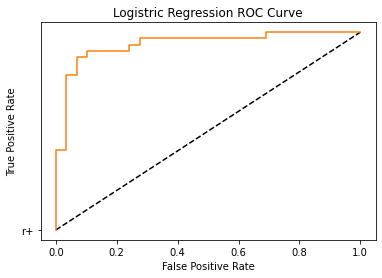

In [23]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

#### 5.2 Tree Models <a id=17></a>

##### 5.2.1 Decision Tree

In [24]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


##### 5.2.2 Random Forest

In [25]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7868852459016393


##### 5.2.3 Gradient Boosting Classifier without tuning

In [26]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934
